In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import scipy 
from scipy.stats import zscore
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("winedata.csv")

In [4]:
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline,Unnamed: 14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,NaN
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,NaN
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,NaN
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,NaN
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,NaN
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,NaN
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,NaN
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,NaN


In [5]:
df.shape

(178, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
 14  Unnamed: 14           0 non-null      float64
dtypes: float64(12), int64(3

In [7]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines', 'Proline',
       'Unnamed: 14'],
      dtype='object')

In [8]:
df.isnull().sum()

Class                     0
Alcohol                   0
Malic acid                0
Ash                       0
Alcalinity of ash         0
Magnesium                 0
Total phenols             0
Flavanoids                0
Nonflavanoid phenols      0
Proanthocyanins           0
Color intensity           0
Hue                       0
diluted wines             0
Proline                   0
Unnamed: 14             178
dtype: int64

In [9]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline,Unnamed: 14
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,0.0
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,NaN
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,NaN
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,NaN
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,NaN
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,NaN
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,NaN
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,NaN


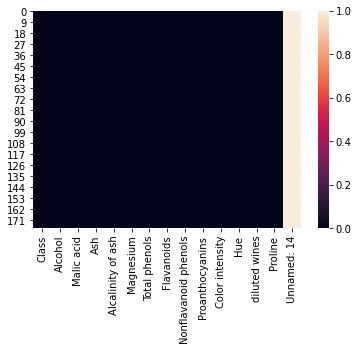

In [10]:
sns.heatmap(df.isnull())

In [11]:
df_corr=df.corr()

In [12]:
df_corr

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline,Unnamed: 14
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717,NaN
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,NaN
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,NaN
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,NaN
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,NaN
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,NaN
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,NaN
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,NaN
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,NaN
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,NaN


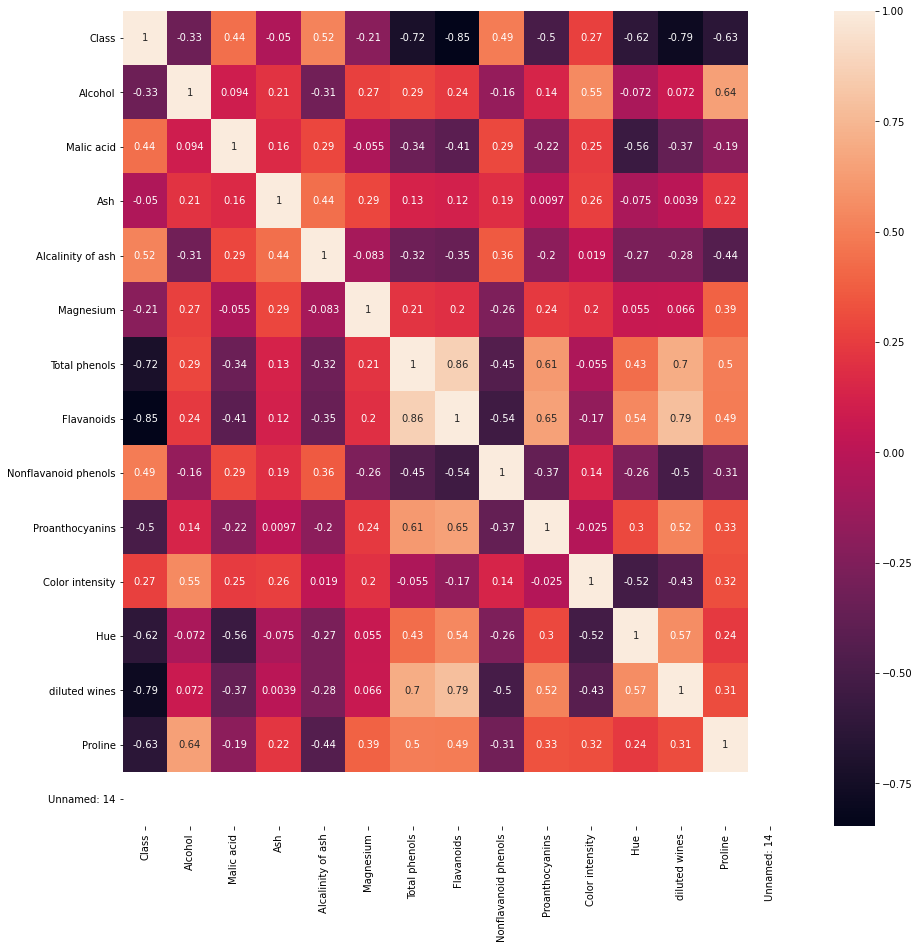

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True)

# ploting outliers

In [14]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines', 'Proline',
       'Unnamed: 14'],
      dtype='object')

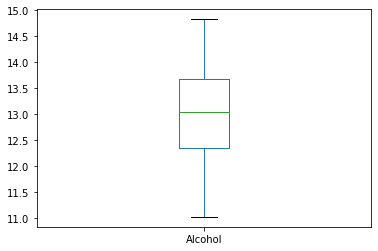

In [15]:
df["Alcohol"].plot.box()

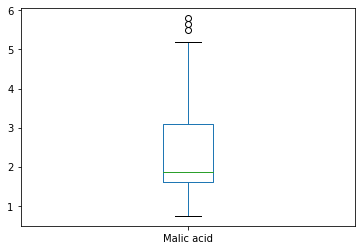

In [16]:
df["Malic acid"].plot.box()

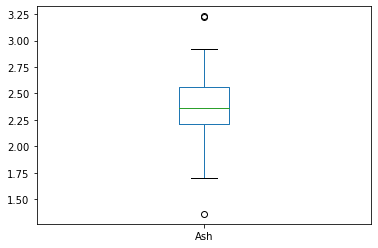

In [17]:
df["Ash"].plot.box()

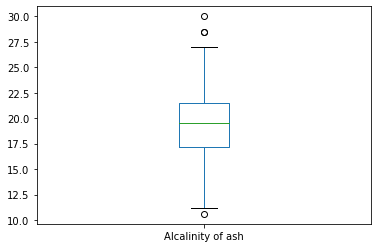

In [18]:
df["Alcalinity of ash"].plot.box()

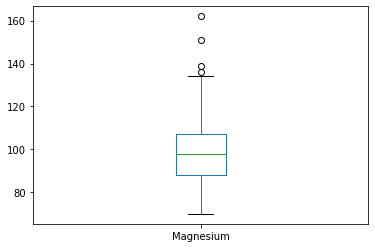

In [19]:
df["Magnesium"].plot.box()

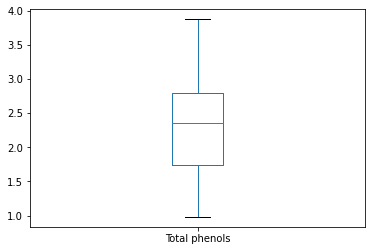

In [20]:
df["Total phenols"].plot.box()

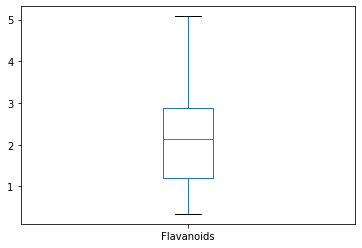

In [21]:
df["Flavanoids"].plot.box()

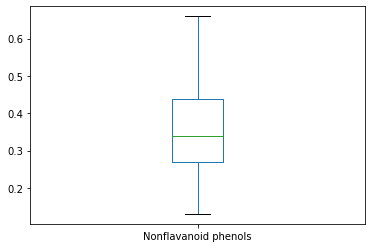

In [22]:
df["Nonflavanoid phenols"].plot.box()

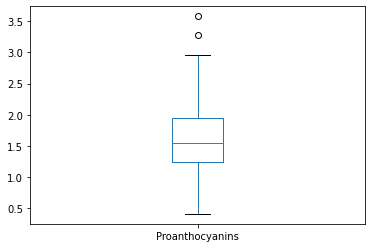

In [23]:
df["Proanthocyanins"].plot.box()

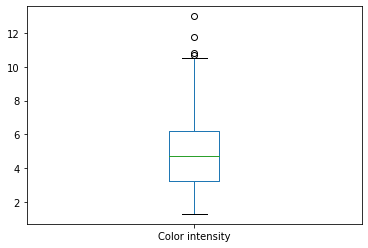

In [24]:
df["Color intensity"].plot.box()

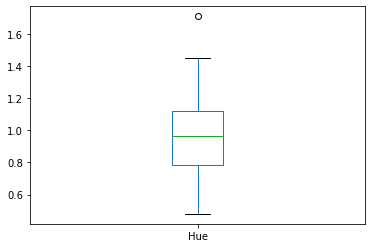

In [25]:
df["Hue"].plot.box()

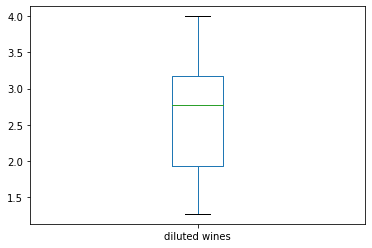

In [26]:
df["diluted wines"].plot.box()

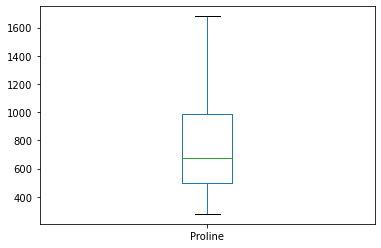

In [27]:
df["Proline"].plot.box()

In [28]:
df.shape

(178, 15)

In [29]:
collist=df.columns.values
ncol=15
nrows=10

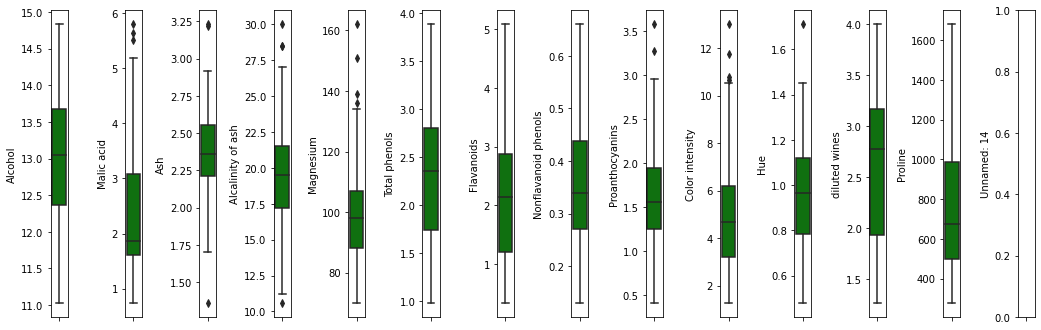

In [30]:
plt.figure(figsize=(ncol,3*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol, i+1)
    sns.boxplot(df[collist[i]],color="green",orient='v')
    plt.tight_layout()

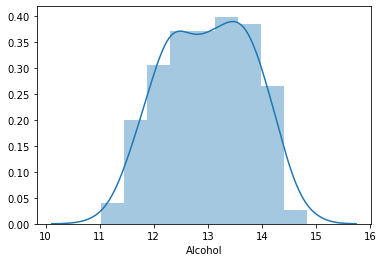

In [31]:
sns.distplot(df["Alcohol"])

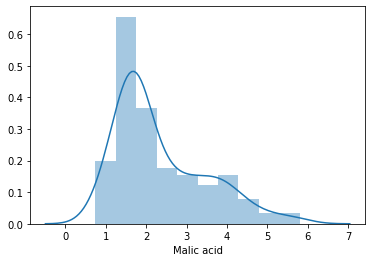

In [32]:
sns.distplot(df["Malic acid"])

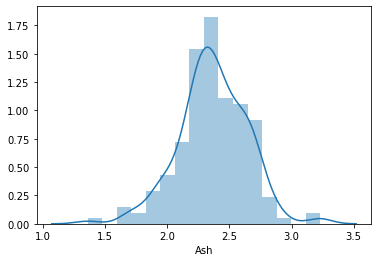

In [33]:
sns.distplot(df["Ash"])

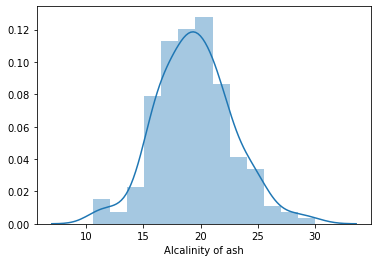

In [34]:
sns.distplot(df["Alcalinity of ash"])

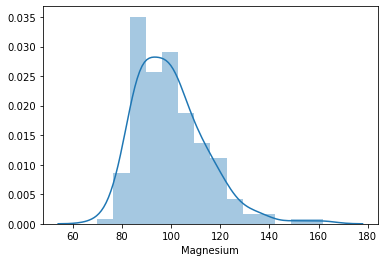

In [35]:
sns.distplot(df["Magnesium"])

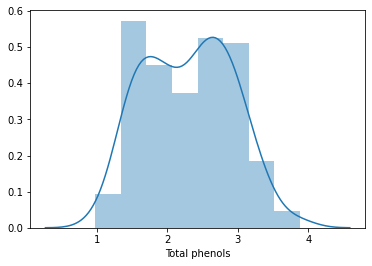

In [36]:
sns.distplot(df["Total phenols"])

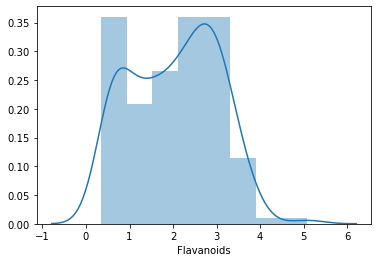

In [37]:
sns.distplot(df["Flavanoids"])

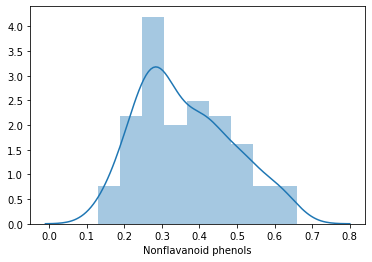

In [38]:
sns.distplot(df["Nonflavanoid phenols"])

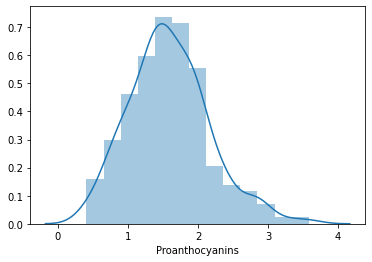

In [39]:
sns.distplot(df["Proanthocyanins"])

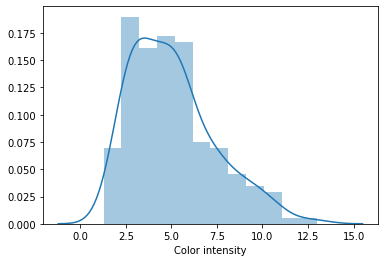

In [40]:
sns.distplot(df["Color intensity"])

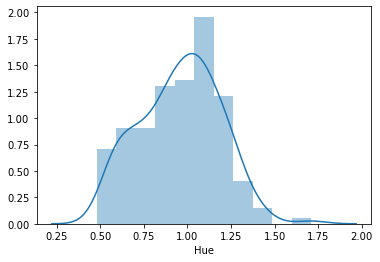

In [41]:
sns.distplot(df["Hue"])

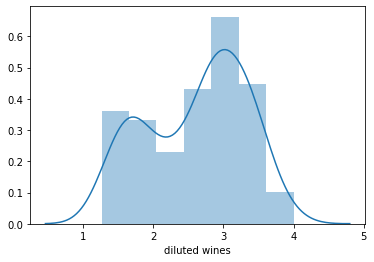

In [42]:
sns.distplot(df["diluted wines"])

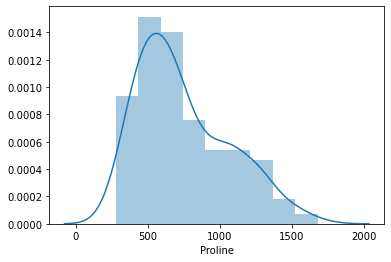

In [43]:
sns.distplot(df["Proline"])

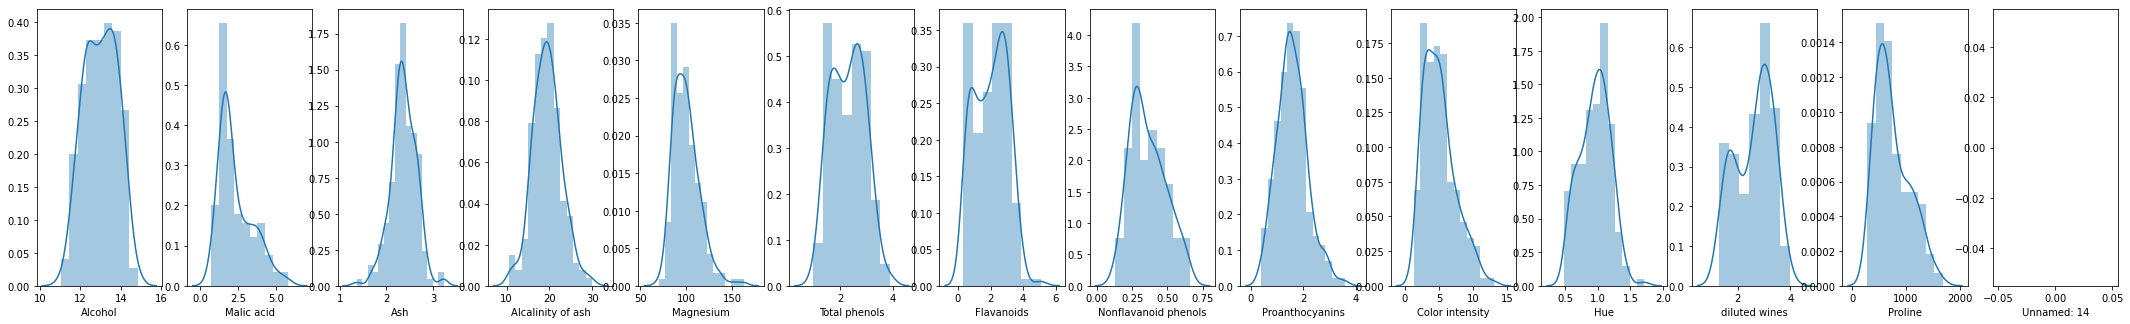

In [44]:
plt.figure(figsize=(40,60))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

Alcohol , Ash Alcalinity of ash, total phenols, Proanthocyanins are normally distributed

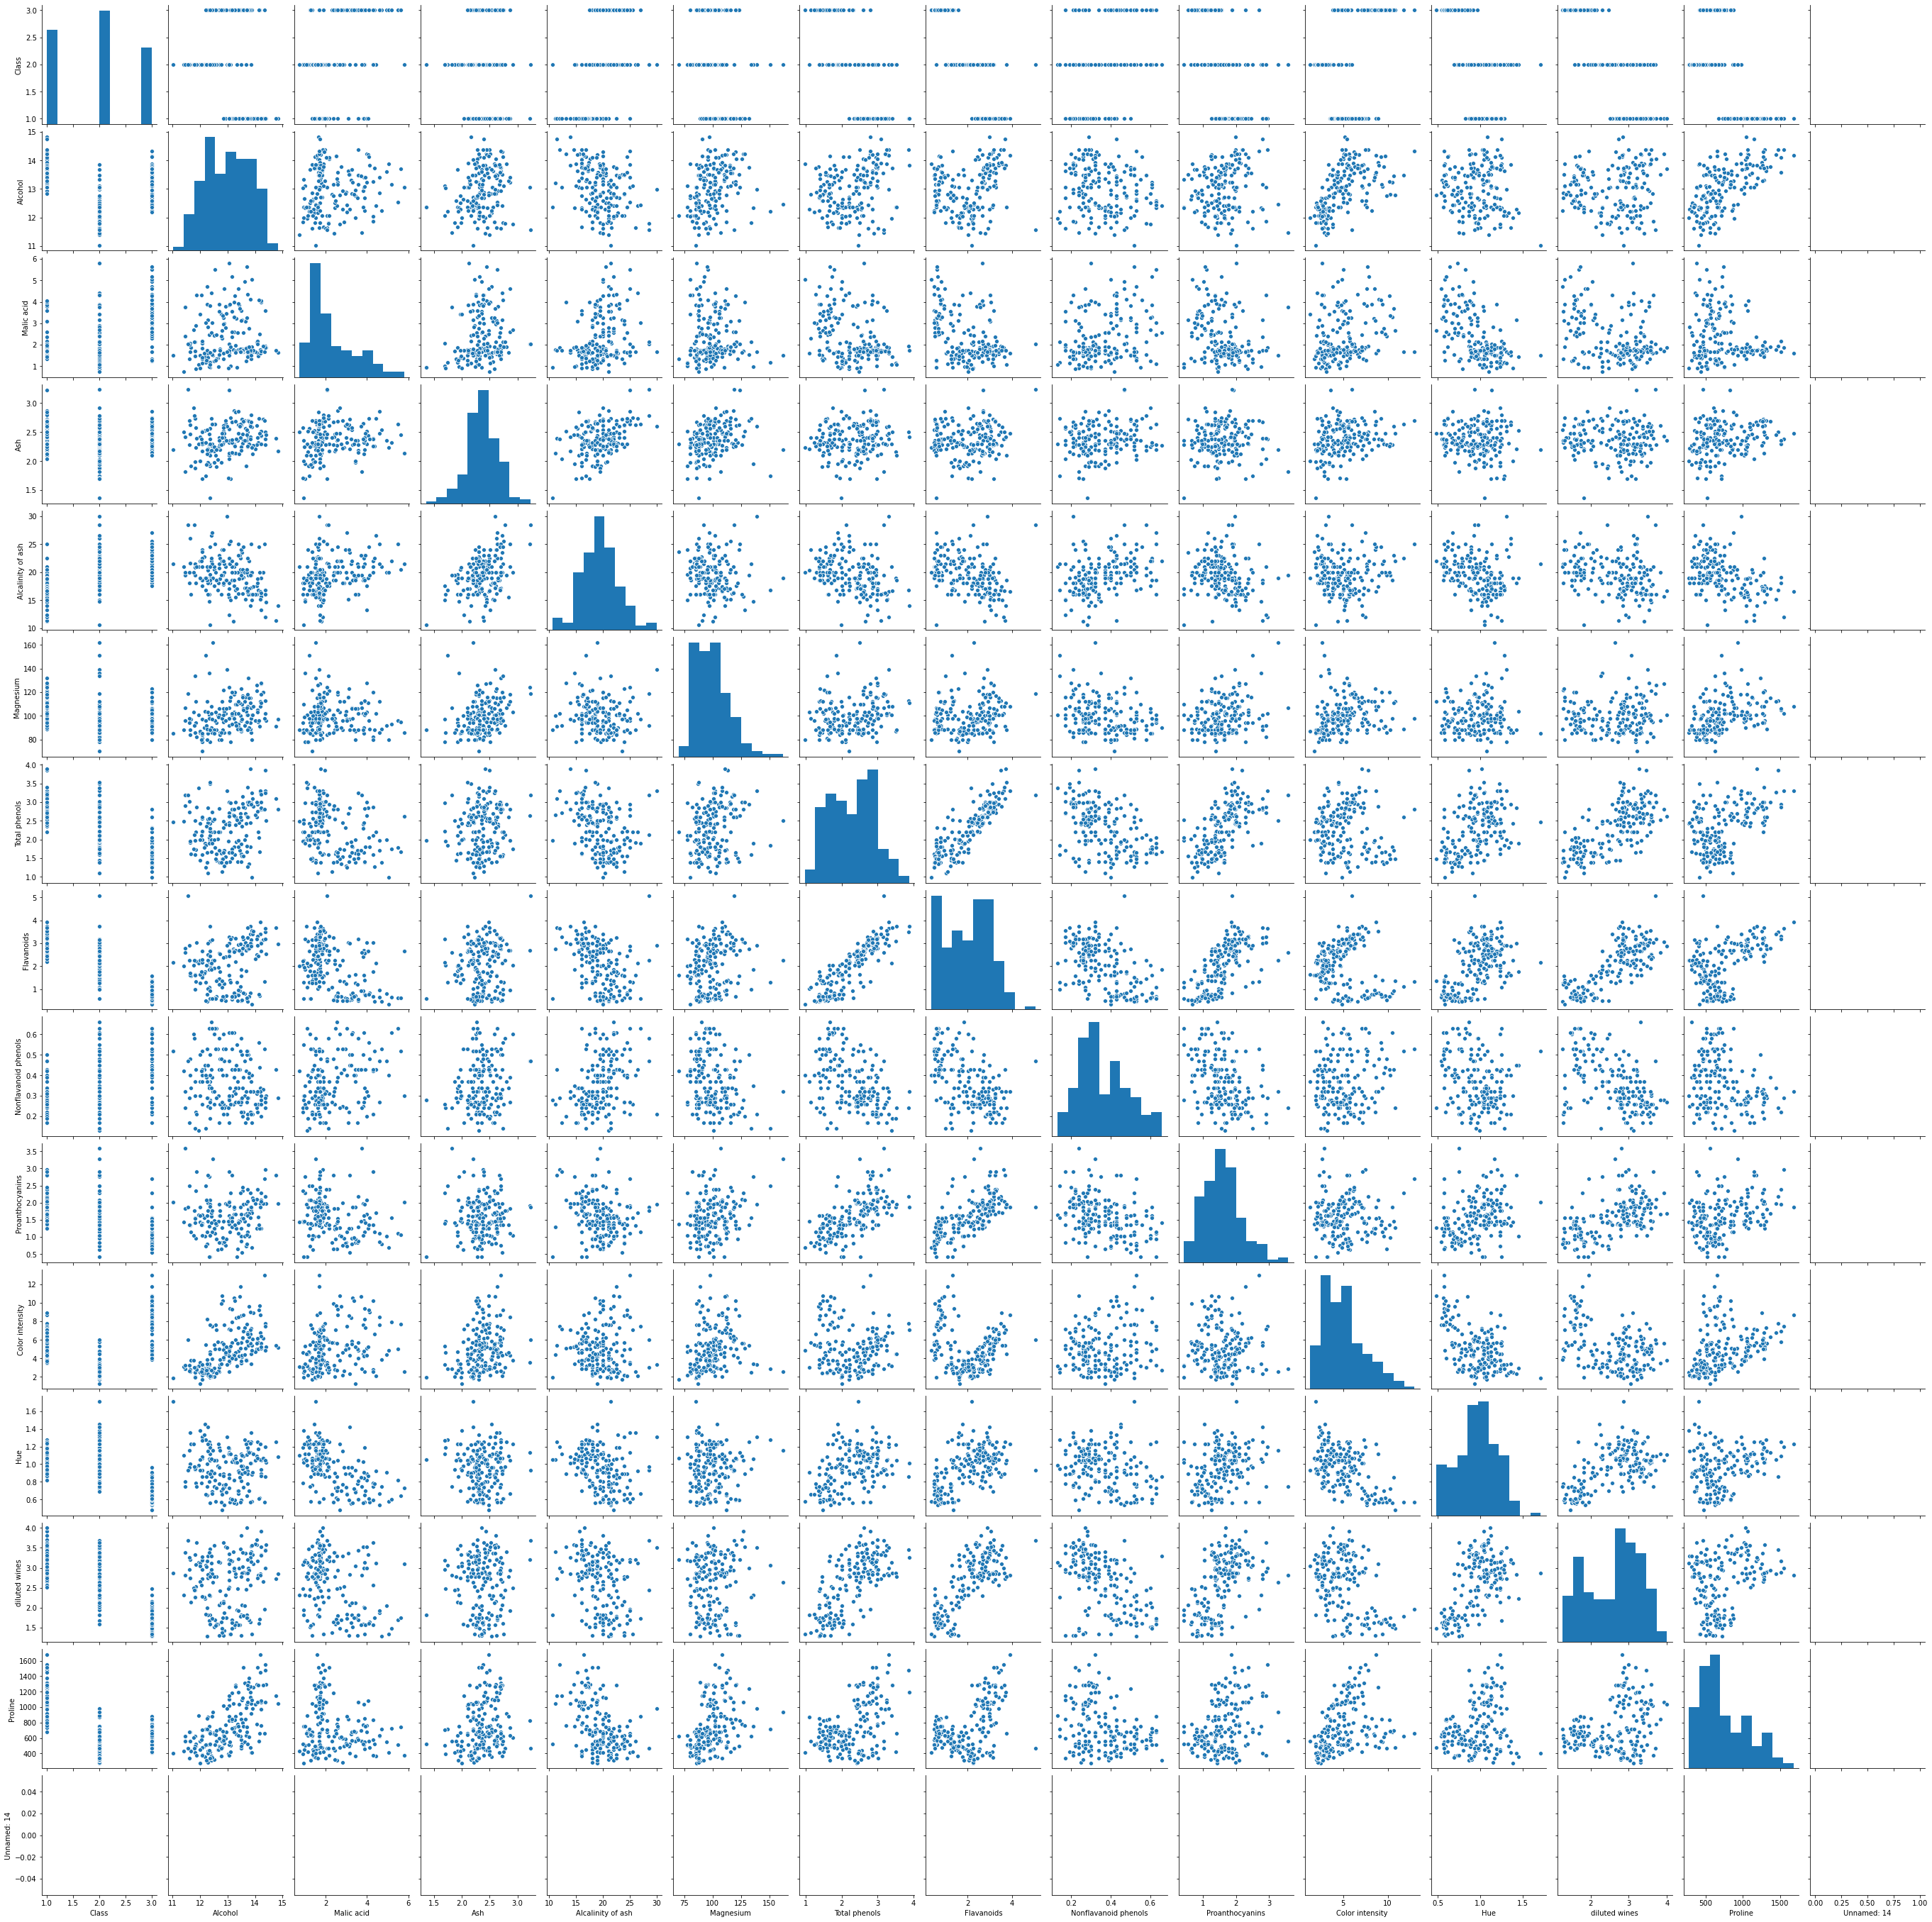

In [45]:
sns.pairplot(df)

# Removing outliers

In [46]:
z=np.abs(zscore(df))
z


array([[1.21394365, 1.51861254, 0.5622498 , ..., 1.84791957, 1.01300893,
               nan],
       [1.21394365, 0.24628963, 0.49941338, ..., 1.1134493 , 0.96524152,
               nan],
       [1.21394365, 0.19687903, 0.02123125, ..., 0.78858745, 1.39514818,
               nan],
       ...,
       [1.37386437, 0.33275817, 1.74474449, ..., 1.48544548, 0.28057537,
               nan],
       [1.37386437, 0.20923168, 0.22769377, ..., 1.40069891, 0.29649784,
               nan],
       [1.37386437, 1.39508604, 1.58316512, ..., 1.42894777, 0.59516041,
               nan]])

In [47]:
threshold=3
print(np.where(z>3))

(array([ 25,  59,  69,  73,  95, 110, 115, 121, 121, 123, 158], dtype=int64), array([ 3,  3,  5,  4,  5,  9, 11,  3,  7,  2, 10], dtype=int64))


In [48]:
df.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
Unnamed: 14                  NaN
dtype: float64

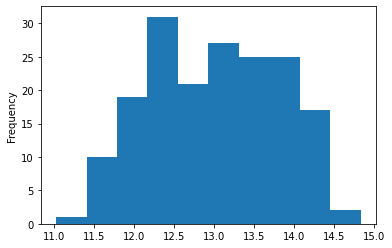

In [49]:
df["Alcohol"].plot.hist()

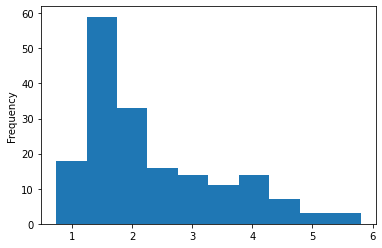

In [50]:
df["Malic acid"].plot.hist()

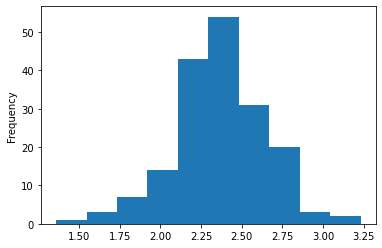

In [51]:
df["Ash"].plot.hist()

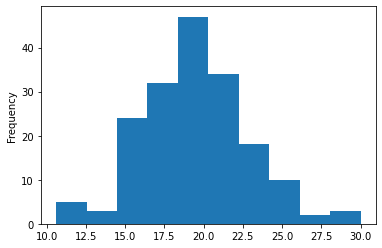

In [52]:
df["Alcalinity of ash"].plot.hist()

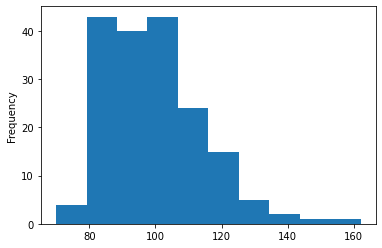

In [53]:
df["Magnesium"].plot.hist()

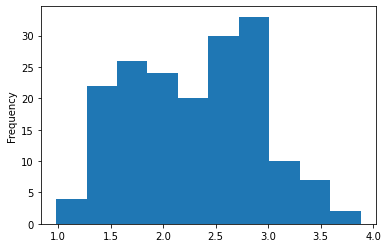

In [54]:
df["Total phenols"].plot.hist()

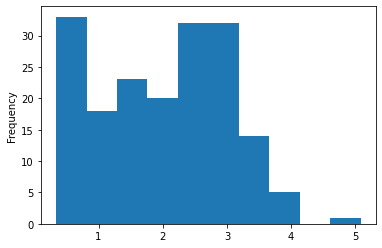

In [55]:
df["Flavanoids"].plot.hist()

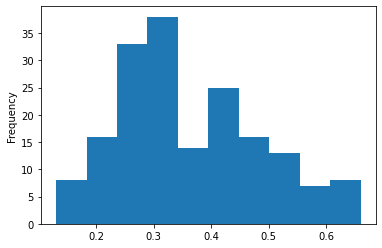

In [56]:
df["Nonflavanoid phenols"].plot.hist()

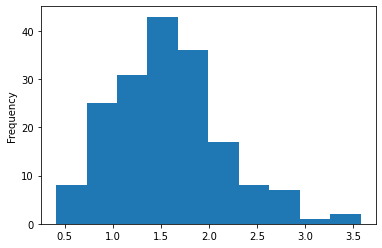

In [57]:
df["Proanthocyanins"].plot.hist()

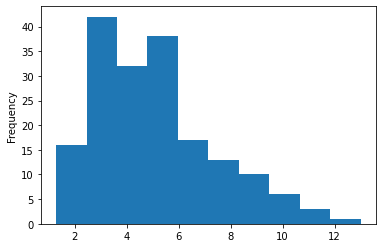

In [58]:
df["Color intensity"].plot.hist()

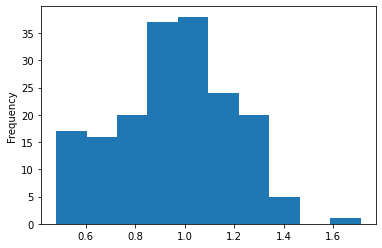

In [59]:
df["Hue"].plot.hist()

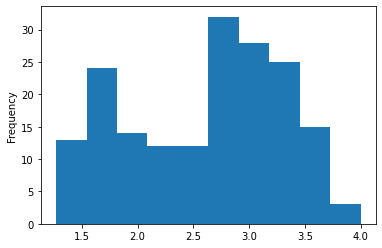

In [60]:
df["diluted wines"].plot.hist()

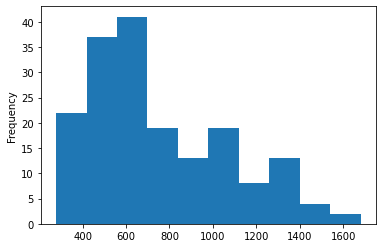

In [61]:
df["Proline"].plot.hist()

# Removing Skewness

In [62]:
from scipy.stats import boxcox
#0 for log transformation  df["Malic acid"]=np.log(df["malic acid"])
#1 for square root transformation 

In [63]:
df["Malic acid"]=boxcox(df["Malic acid"],1)

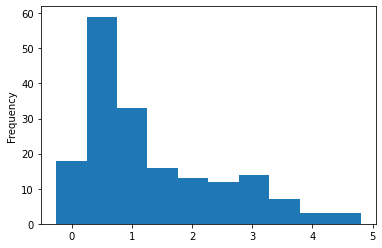

In [64]:
df["Malic acid"].plot.hist()

In [65]:
df.drop("Unnamed: 14",axis=1,inplace=True)

In [66]:
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,0.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,0.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,1.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,0.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,1.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,4.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,2.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,3.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,1.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Model creation

In [67]:
x=df.iloc[:,1:]
x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,14.23,0.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,0.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,1.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,0.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,1.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,4.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,2.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,3.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,1.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [68]:
y=df.iloc[:,0]
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64


In [69]:
x.shape

(178, 13)

In [70]:
y.shape

(178,)

# Training the model

In [71]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=43)
x_train.shape

(119, 13)

In [73]:
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(59, 13)
(119,)
(59,)


In [74]:
lr=LinearRegression()

In [75]:
lr.fit(x_train,y_train)


LinearRegression()

In [76]:
lr.coef_

array([-1.08854478e-01,  5.29404065e-02, -1.46371089e-01,  4.24411352e-02,
       -2.33773641e-03,  1.95940405e-01, -4.40903958e-01, -5.44039758e-01,
        5.47994522e-02,  7.04651757e-02, -6.26871870e-02, -2.76629794e-01,
       -5.22147757e-04])

In [77]:
lr.intercept_

4.3923802122539755

In [78]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline'],
      dtype='object')

In [79]:
lr.score(x_train,y_train)

0.9032015890314228

In [80]:
#predict the value
pred=lr.predict(x_test)
print("predict result class:",pred)
print("actual class: ",y_test)

predict result class: [2.85502246 2.05953492 1.16244757 0.88718077 2.12611783 1.8526316
 2.89787185 1.14522886 1.89564787 1.55649778 1.85010301 1.13807999
 1.86878201 1.47877808 0.75485551 2.1208257  3.14364787 2.90565944
 1.25652258 2.98971642 1.16690536 1.45558687 0.91018715 1.3169251
 2.71613847 1.22485146 2.83912986 2.09558098 1.07925606 1.99173525
 1.5294544  1.69908999 2.74541057 1.74978149 1.07231953 2.41568876
 1.11754182 1.46705991 0.80705395 2.62782331 2.59521599 1.11439342
 1.17017824 2.93743463 1.49804524 3.04813646 3.08561808 1.80916726
 3.07816172 0.97921697 2.46527816 1.20341582 3.01560423 2.38765907
 1.74921059 1.08793199 1.0169084  1.28185231 3.15930476]
actual class:  133    3
90     2
17     1
10     1
92     2
79     2
154    3
2      1
67     2
95     2
62     2
19     1
80     2
109    2
0      1
77     2
177    3
173    3
38     1
153    3
11     1
37     1
1      1
45     1
134    3
29     1
170    3
122    2
39     1
76     2
55     1
65     2
138    3
71     2

In [81]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [82]:
print("mean Absolute error: ",mean_absolute_error(y_test,pred))
print("mean squared error: ", mean_squared_error(y_test,pred))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred)))

mean Absolute error:  0.22126705523202092
mean squared error:  0.08263742466887863
Root mean squared error:  0.28746725842933596


In [83]:
# r2 score
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8798409042304234


# Model saving.

In [85]:
import pickle
filename="Wine project"
pickle.dump(lr,open(filename,"wb"))